In [7]:
# =======================
# 1. IMPORT THƯ VIỆN
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# =======================
# 2. ĐỌC DỮ LIỆU
# =======================
# Construct the path to the data file in an OS-independent way
data_dir='data'
filename='data_simple_reg.csv'
# Get the current working directory of the script
current_dir = os.getcwd()

# Construct the path to the data file by going up one level ('..')
# and then into the 'data' folder.
file_path = os.path.join(current_dir, '..', '..', data_dir, filename)

# Normalize the path to resolve '..' and get the absolute path
file_path = os.path.abspath(file_path)

df = pd.read_csv(file_path)

# Bỏ cột thừa nếu có
if "Unnamed: 0" in df.columns:
    df = df.drop(columns=["Unnamed: 0"])

print("🔹 Dữ liệu sau khi load:\n", df.head())

🔹 Dữ liệu sau khi load:
    Quảng Cáo  Tiếp Thị POS    Online  Doanh Số Bán
0       12.0      5.993562  3.730133     79.732757
1       13.0      6.741511  3.006753     71.677897
2       41.0     15.405956  2.987338    175.177829
3       78.0     28.294987  6.934639    323.246340
4       11.0      6.663944  1.633811     81.594181


In [8]:

# =======================
# 3. THỐNG KÊ MÔ TẢ
# =======================
print("\n🔹 Thống kê mô tả:")
print(df.describe())

print("\n🔹 Kiểm tra missing values:")
print(df.isnull().sum())



🔹 Thống kê mô tả:
         Quảng Cáo  Tiếp Thị POS       Online  Doanh Số Bán
count  4562.000000   4568.000000  4566.000000   4566.000000
mean     49.576502     16.931319     3.817391    217.466602
std      26.267450      9.637029     2.231164     93.133092
min       1.000000      0.000684     0.028222     56.199409
25%      27.000000      9.291549     2.018472    137.322882
50%      49.000000     16.442673     3.541586    214.231172
75%      72.000000     24.416902     5.317158    297.507922
max     100.000000     48.155991    13.983817    389.079751

🔹 Kiểm tra missing values:
Quảng Cáo       10
Tiếp Thị POS     4
Online           6
Doanh Số Bán     6
dtype: int64


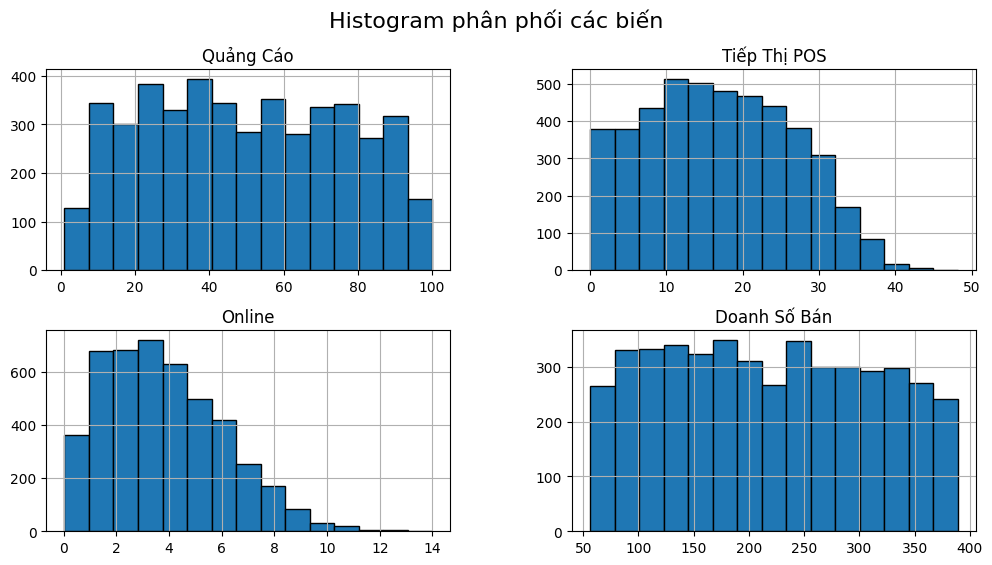

In [9]:
# =======================
# 4. VẼ HISTOGRAM
# =======================
df.hist(figsize=(12, 6), bins=15, edgecolor='black')
plt.suptitle("Histogram phân phối các biến", fontsize=16)
plt.show()

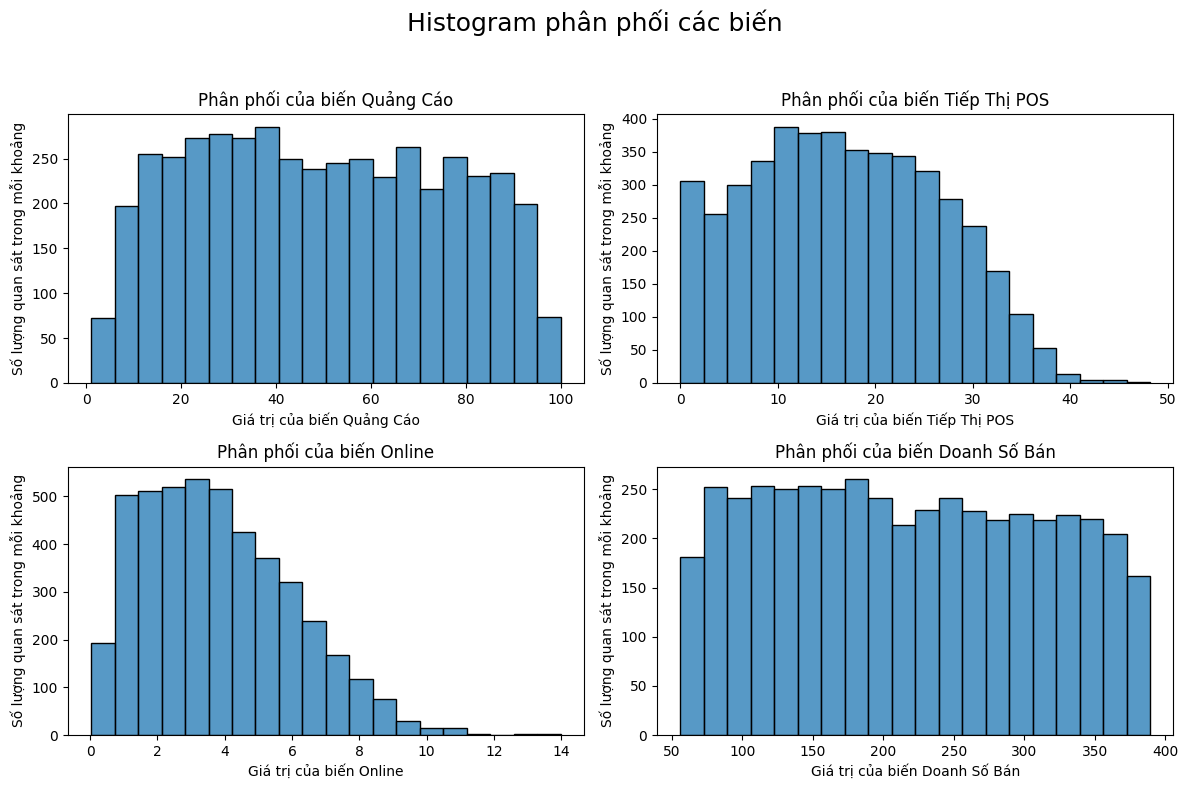

In [14]:
# =======================
# 4. VẼ HISTOGRAM CHI TIẾT
# =======================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Histogram phân phối các biến", fontsize=18)

columns = ["Quảng Cáo", "Tiếp Thị POS", "Online", "Doanh Số Bán"]
axes = axes.ravel()

for i, col in enumerate(columns):
    sns.histplot(df[col], bins=20, kde=False, ax=axes[i])

    # --- Thêm mô tả trục X và Y ---
    axes[i].set_xlabel(f"Giá trị của biến {col}")              # Trục X = giá trị biến
    axes[i].set_ylabel("Số lượng quan sát trong mỗi khoảng")  # Trục Y = tần suất
    axes[i].set_title(f"Phân phối của biến {col}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

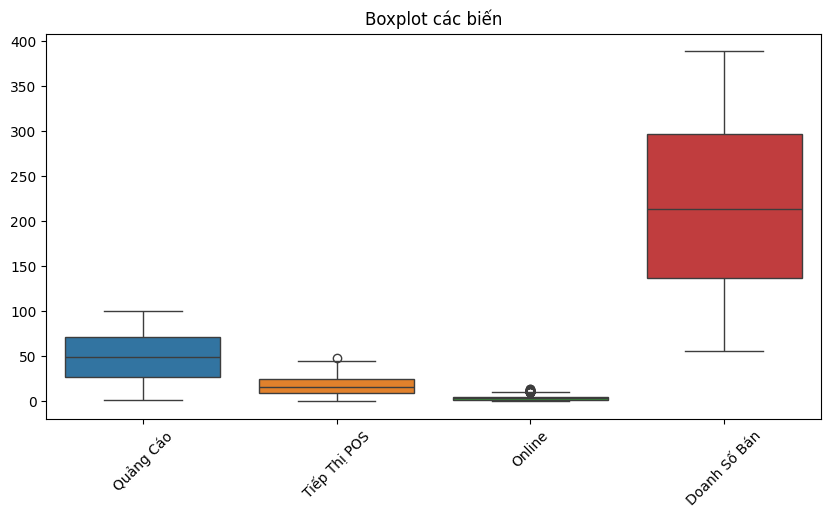

In [10]:
# =======================
# 5. BOXPLOT (PHÁT HIỆN OUTLIERS)
# =======================
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title("Boxplot các biến")
plt.xticks(rotation=45)
plt.show()


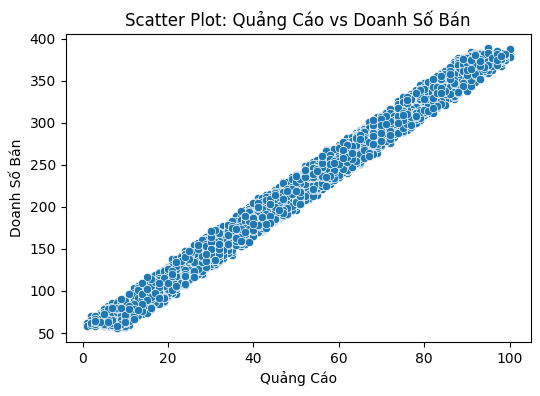

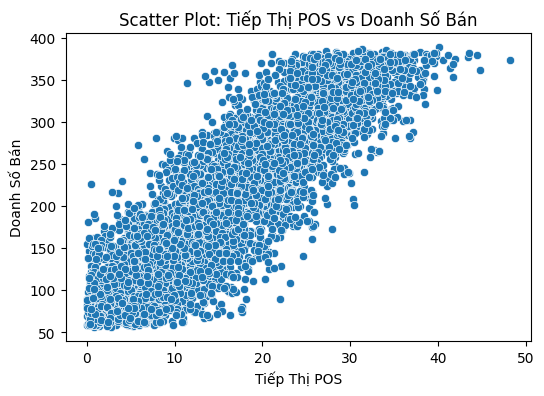

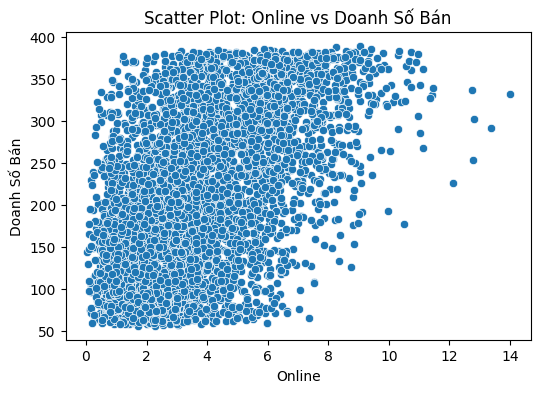

In [11]:
# =======================
# 6. SCATTER PLOT VỚI BIẾN MỤC TIÊU
# =======================

target = "Doanh Số Bán"

for col in df.columns:
    if col != target:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f"Scatter Plot: {col} vs {target}")
        plt.xlabel(col)
        plt.ylabel(target)
        plt.show()


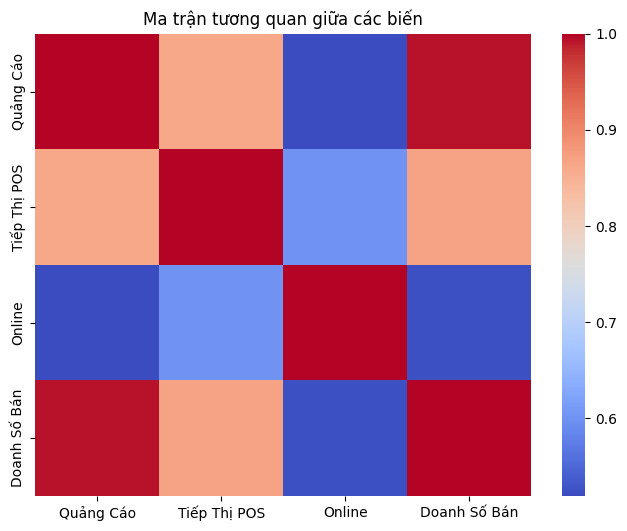

In [ ]:
# =======================
# 7. MA TRẬN TƯƠNG QUAN
# =======================
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()